In [1]:
from hydipy import Discrete, Continuous, DynamicDiscretization
from hydipy.Distributions import NormalDistribution, ExponentialDistribution

# Basic Examples

This notebook shows hybrid BN examples of 
1. continuous nodes with discrete parents, 
1. continuous nodes with continuous parents,
1. deterministic functions with continuous parents

## 1. Mixture Distribution



$$
\begin{align*} 
p(x) &= \begin{cases} 0.7 & \text{if} \quad x = a \\
0.3 & \text{if} \quad x= b \end{cases}\\
y &\sim \begin{cases} \text{Normal}(5,1) & \text{if} \quad x = a \\
\text{Normal}(1,3) & \text{if} \quad x= b
\end{cases}

\end{align*}
$$

In [2]:
x = Discrete.DiscreteNode(
    id="x", 
    values=[[0.7],[0.3]],
    parents=[],
    states=['a','b'])
y = Continuous.MixtureNode(
    id="y", 
    values=[[NormalDistribution(5,1)],[NormalDistribution(1,3)]],
    parents=['x'])

In [3]:
hbn = DynamicDiscretization.Hybrid_BN([x,y])
dd = DynamicDiscretization.DynamicDiscretization(hbn)


***** Variable: y ******

Mean: 5.002, Std. Dev: 1.006
Percentile (5.0% — 95.0%) = (3.351 — 6.672)
CPU times: user 34.4 ms, sys: 7.39 ms, total: 41.8 ms
Wall time: 41.1 ms


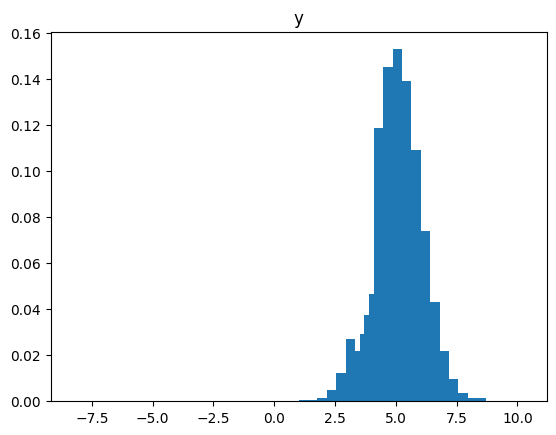

In [4]:
%%time
post = dd.query(['y'], evidence={'x':'a'}, show_stats=True, n_iter=20, show_figures=True)

***** Variable: x ******


  x                |
a        |b        |
---------|---------|
 0.5416  | 0.4584  |

CPU times: user 19.6 ms, sys: 0 ns, total: 19.6 ms
Wall time: 18.7 ms


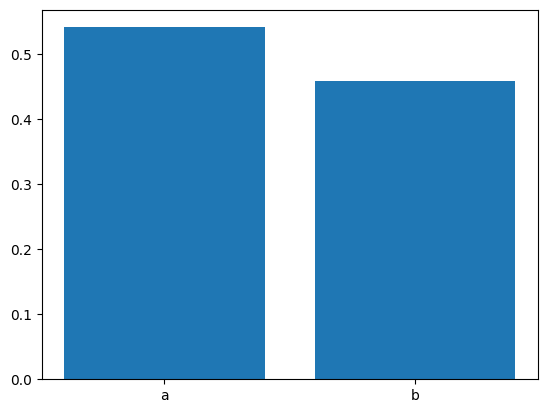

In [5]:
%%time
post = dd.query(['x'], evidence={'y':'3'}, show_stats=True, show_figures=True)

## 2. Continuous Nodes

$$
\begin{align*} 
\mu &\sim \text{Normal}(5,1) \\
\sigma &\sim \text{Exponential}(1) \\
x_i &\sim \text{Normal}(\mu, \sigma) 

\end{align*}
$$

In [6]:
mu = Continuous.ContinuousNode(id='mu', dist=NormalDistribution(5.0,1.0))
sigma = Continuous.ContinuousNode(id='sigma', dist=ExponentialDistribution(1.0))

data = {'x_1':6.1, 'x_2':6.5, 'x_3':8.0, 'x_4':5.1, 'x_5':7.9, 'x_6':7.7}
observed_nodes = []

for obs_id in data.keys():
    obs_node = Continuous.ContinuousNode(id = obs_id, dist=NormalDistribution("mu", "sigma"), parents=["mu", "sigma"])
    observed_nodes.append(obs_node)

all_nodes = [mu, sigma] + observed_nodes
hbn = DynamicDiscretization.Hybrid_BN(all_nodes)
dd = DynamicDiscretization.DynamicDiscretization(hbn)


***** Variable: mu ******

Mean: 6.444, Std. Dev: 0.524
Percentile (5.0% — 95.0%) = (5.519 — 7.219)
***** Variable: sigma ******

Mean: 1.351, Std. Dev: 0.474
Percentile (5.0% — 95.0%) = (0.791 — 2.243)
CPU times: user 3.37 s, sys: 21.1 ms, total: 3.39 s
Wall time: 3.39 s


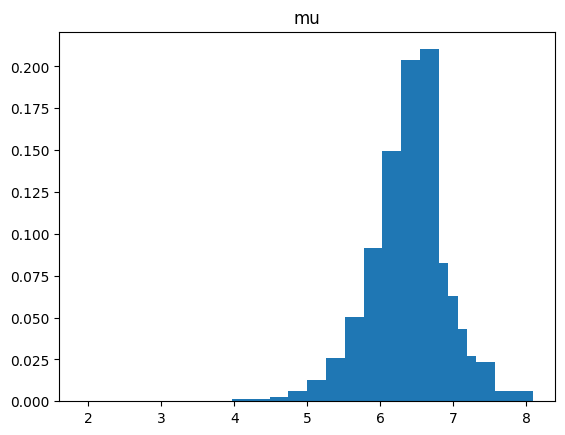

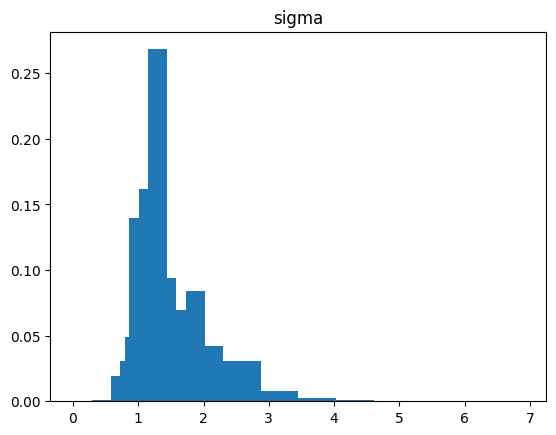

In [7]:
%%time
post = dd.query(['mu','sigma'], evidence=data, n_iter=15, show_stats=True, show_figures=True)

## 3. Deterministic Nodes


$$
\begin{align*} 
x &\sim \text{Normal}(5,1) \\
y &\sim \text{Normal}(1,2) \\
z &= 2x + y 

\end{align*}
$$

In [8]:
def f(x,y):
    return 2*x + y

In [9]:
x = Continuous.ContinuousNode(id='x', dist=NormalDistribution(5,1))
y = Continuous.ContinuousNode(id='y', dist=NormalDistribution(1,2))
z = Continuous.Deterministic(id='z',expression=f, parents=['x','y'])

In [10]:
hbn = DynamicDiscretization.Hybrid_BN([x,y,z])
dd = DynamicDiscretization.DynamicDiscretization(hbn)

***** Variable: x ******

Mean: 4.300, Std. Dev: 0.712
Percentile (5.0% — 95.0%) = (3.129 — 5.470)
***** Variable: y ******

Mean: -0.401, Std. Dev: 1.424
Percentile (5.0% — 95.0%) = (-2.742 — 1.940)
***** Variable: z ******

Mean: 8.000, Std. Dev: 0.000
Percentile (5.0% — 95.0%) = (7.928 — 8.072)
CPU times: user 262 ms, sys: 1.88 ms, total: 264 ms
Wall time: 263 ms


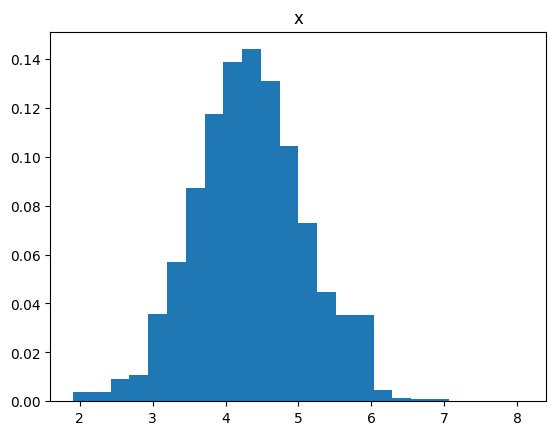

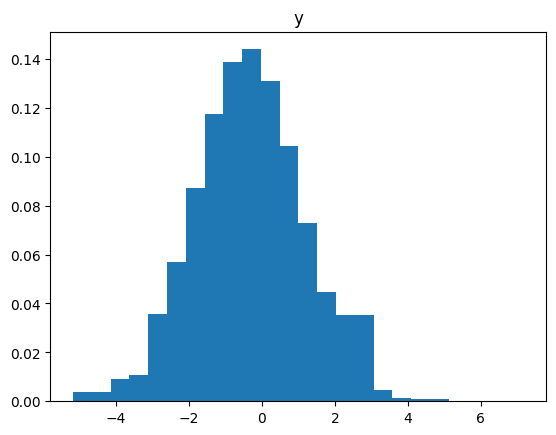

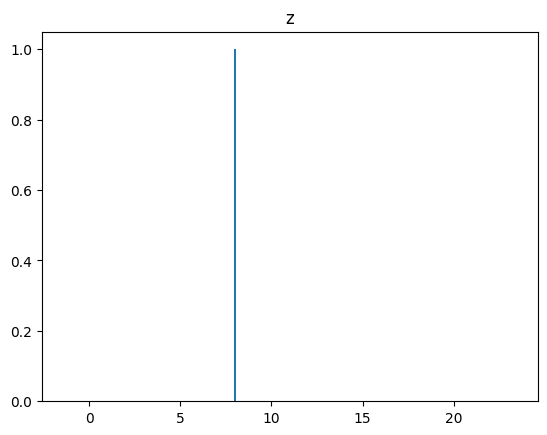

In [11]:
%%time
post = dd.query(['x','y','z'], evidence={'z': 8},show_figures=True, n_iter=15, show_stats=True)